In [6]:
import networkx as nx

%matplotlib inline

In [7]:
nx.__version__

'2.1'

In [2]:
G = nx.read_gpickle("../jgi/SAFR-032_reaction_compound_graph_with_attributes.pkl")

/Library/Python/2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


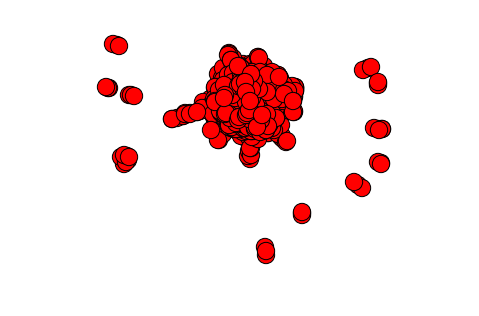

In [8]:
nx.draw(G)

### Re-write graph

### Add bipartite attributes

In [9]:
r_nodes = [n for n in list(G.nodes()) if n.startswith("R")]
c_nodes = [n for n in list(G.nodes()) if n.startswith("C")]

bipartite_label = dict()
for c in c_nodes:
    bipartite_label[c] = {"bipartite":0}
    
for r in r_nodes:
    bipartite_label[r] = {"bipartite":1}

## Sets the bipartite attribute
nx.set_node_attributes(G, bipartite_label)

In [10]:
def test_bipartite_attributes(G):
    compound_nodes = {n for n, d in G.nodes(data=True) if d['bipartite']==0}
    reaction_nodes = set(G) - compound_nodes
    
    assert nx.bipartite.is_bipartite_node_set(G,compound_nodes)==True

In [11]:
test_bipartite_attributes(G)